In [3]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [6]:
df = df.dropna()
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [8]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')
y[:3]
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


In [10]:
mod = sm.OLS(y, X)
res = mod.fit() 
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 11 Jan 2017   Prob (F-statistic):           1.07e-05
Time:                        14:34:08   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [11]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [12]:
 sm.stats.linear_rainbow(res)

(0.84723399761569129, 0.69979655436216426)

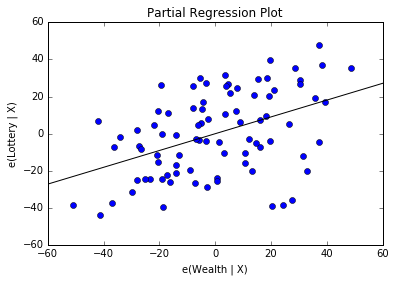

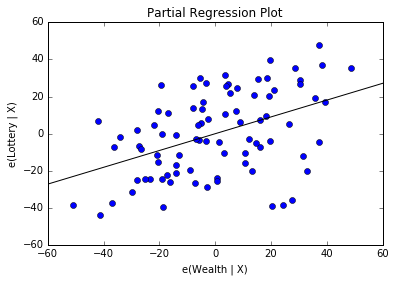

In [15]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],data=df, obs_labels=False)

In [16]:
from __future__ import print_function